<a href="https://colab.research.google.com/github/aksanaboo/sephora/blob/main/SephoraEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [169]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [198]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [171]:
#datasets
product = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/product_info.csv')
review_1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/reviews_0-250.csv')
review_2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/reviews_250-500.csv')
review_3 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/reviews_500-750.csv')
review_4 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/reviews_750-1250.csv')
review_5 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/reviews_1250-end.csv')

<ipython-input-171-e4867818210a>:3: DtypeWarning:

Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.

<ipython-input-171-e4867818210a>:6: DtypeWarning:

Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.

<ipython-input-171-e4867818210a>:7: DtypeWarning:

Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.



## Product dataset clean up and exploration

**Product Data Content  features and Description**

**product_id:**	The unique identifier for the product from the site

**product_name:**	The full name of the product

**brand_id:**	The unique identifier for the product brand from the site

**brand_name:**	The full name of the product brand

**loves_count:**	The number of people who have marked this product as a favorite

**rating:**	The average rating of the product based on user reviews

**reviews:**	The number of user reviews for the product

**size:**	The size of the product, which may be in oz, ml, g, packs, or other units depending on the product type

**variation_type:**	The type of variation parameter for the product (e.g. Size, Color)

**variation_value:**	The specific value of the variation parameter for the product (e.g. 100 mL, Golden Sand)

**variation_desc:**	A description of the variation parameter for the product (e.g. tone for fairest skin)

**ingredients:**	A list of ingredients included in the product

**price_usd:**	The price of the product in US dollars

**value_price_usd:**	The potential cost savings of the product, presented on the site next to the regular price

**sale_price_usd:**	The sale price of the product in US dollars

**limited_edition:**	Indicates whether the product is a limited edition or not (1-true, 0-false)

**new:**	Indicates whether the product is new or not (1-true, 0-false)

**online_only:**	Indicates whether the product is only sold online or not (1-true, 0-false)

**out_of_stock:** Indicates whether the product is currently out of stock or not (1 if true, 0 if false)

**sephora_exclusive:**	Indicates whether the product is exclusive to Sephora or not (1 if true, 0 if false)

**highlights:**	A list of tags or features that highlight the product's attributes

**primary_category:**	First category in the breadcrumb section

**secondary_category:**	Second category in the breadcrumb section

**tertiary_category:**	Third category in the breadcrumb section

**child_count:**	The number of variations of the product available

**child_max_price:**	The highest price among the variations of the product

**child_min_price:**	The lowest price among the variations of the product

In [172]:
product.head(2)

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,...,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,85.0,30.0


In [173]:
#check rows and columns
product.shape

(8494, 27)

In [174]:
#check missing values
product.isnull().sum()

product_id               0
product_name             0
brand_id                 0
brand_name               0
loves_count              0
rating                 278
reviews                278
size                  1631
variation_type        1444
variation_value       1598
variation_desc        7244
ingredients            945
price_usd                0
value_price_usd       8043
sale_price_usd        8224
limited_edition          0
new                      0
online_only              0
out_of_stock             0
sephora_exclusive        0
highlights            2207
primary_category         0
secondary_category       8
tertiary_category      990
child_count              0
child_max_price       5740
child_min_price       5740
dtype: int64

In [175]:
#check for duplicates
product.duplicated().sum()

0

In [176]:
# remove irrelevant columns and missing ratings and reviews
product.dropna(subset=['rating','reviews'],inplace=True)

In [177]:
product.drop(columns=['child_max_price','child_min_price','value_price_usd','sale_price_usd','variation_type','variation_value','variation_desc'],inplace=True)

In [178]:
# input Unknown at NaN
product.fillna('Unknown', inplace=True)

In [179]:
product.isnull().sum()

product_id            0
product_name          0
brand_id              0
brand_name            0
loves_count           0
rating                0
reviews               0
size                  0
ingredients           0
price_usd             0
limited_edition       0
new                   0
online_only           0
out_of_stock          0
sephora_exclusive     0
highlights            0
primary_category      0
secondary_category    0
tertiary_category     0
child_count           0
dtype: int64

In [180]:
product.head()

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,ingredients,price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,Unknown,"['Capri Eau de Parfum:', 'Alcohol Denat. (SD A...",35.0,0,0,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,0,0,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,0,0,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 mL,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,0,0,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 mL,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,0,0,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2


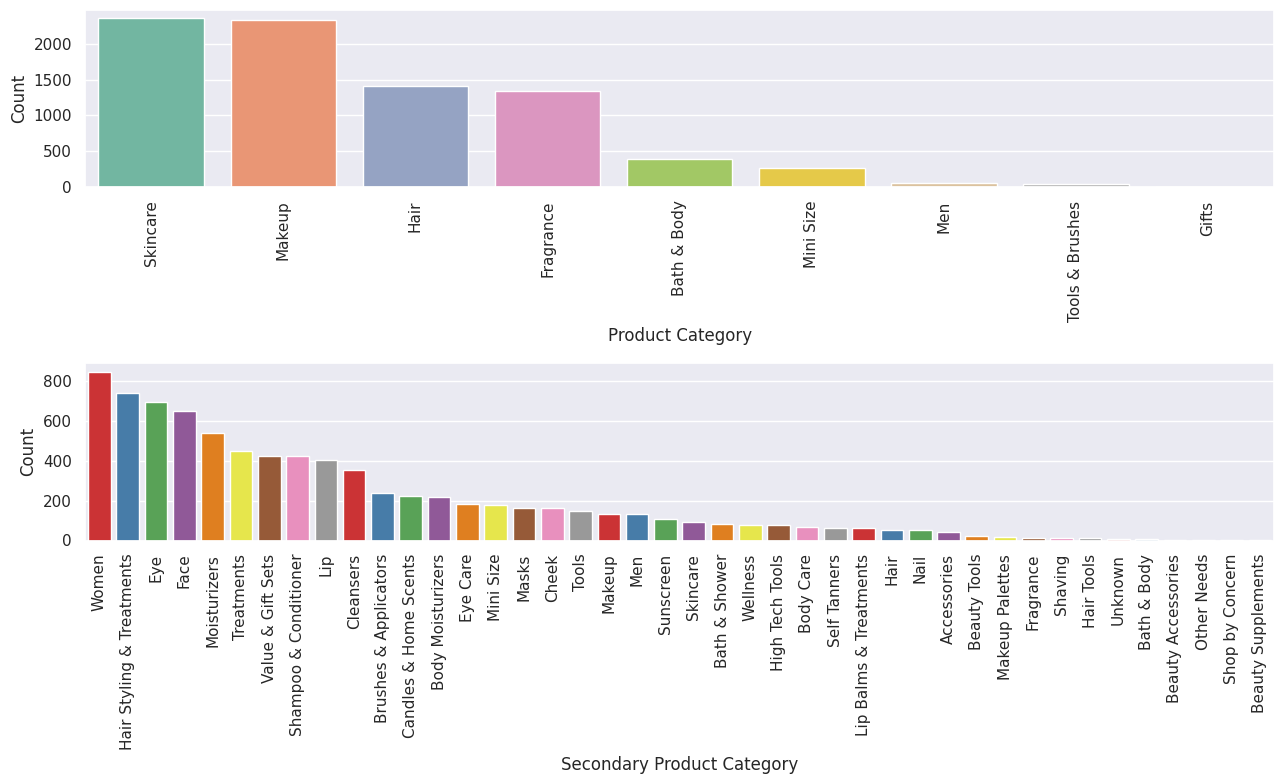

In [181]:
#Product Categories - Primary and Secondary categories
fig, axes = plt.subplots(2, 1, figsize=(13, 8))

# Plot the first subplot
sorted_categories = product['primary_category'].value_counts().sort_values(ascending=False).index
sns.set(style="darkgrid")
sns.countplot(x=product['primary_category'], palette='Set2', order=sorted_categories, ax=axes[0])
axes[0].set_xlabel('Product Category')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)

# Plot the second subplot
sorted_categories = product['secondary_category'].value_counts().sort_values(ascending=False).index
sns.set(style="darkgrid")
sns.countplot(x=product['secondary_category'], palette='Set1', order=sorted_categories, ax=axes[1])
axes[1].set_xlabel('Secondary Product Category')
axes[1].set_ylabel('Count')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

In [182]:
#Primary and Secondary categories - Treemap
fig = px.treemap(product, path=[px.Constant("Category"),'primary_category', 'secondary_category'],color='primary_category')
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.update_traces(marker=dict(cornerradius=5))
fig.show()

In [183]:
#Secondary and Tertiary categories - Treemap
fig = px.treemap(product, path=[px.Constant("Category"),'secondary_category', 'tertiary_category'],color='secondary_category')
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.update_traces(marker=dict(cornerradius=5))
fig.show()

In [184]:
product.columns

Index(['product_id', 'product_name', 'brand_id', 'brand_name', 'loves_count',
       'rating', 'reviews', 'size', 'ingredients', 'price_usd',
       'limited_edition', 'new', 'online_only', 'out_of_stock',
       'sephora_exclusive', 'highlights', 'primary_category',
       'secondary_category', 'tertiary_category', 'child_count'],
      dtype='object')

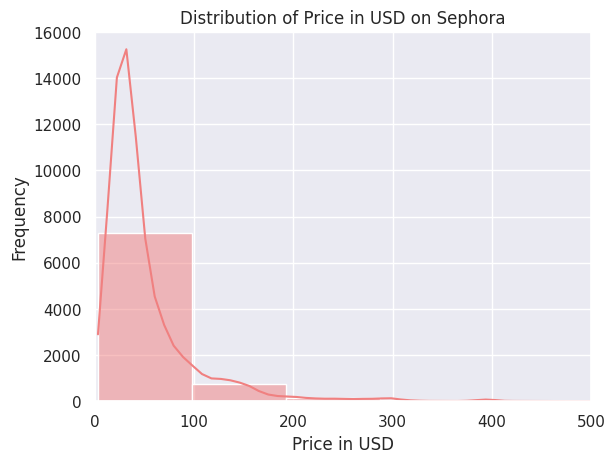

In [185]:
#price distribution (overall)
sns.histplot(data=product,x ='price_usd',bins=20,kde=True,color='lightcoral')
plt.xlabel('Price in USD')
plt.ylabel('Frequency')
plt.xlim(0,500)
plt.title('Distribution of Price in USD on Sephora')
plt.show()

In [186]:
## Top 30 most expensive brands and products

In [187]:
#brands
brand = product.groupby('brand_name')['price_usd','rating'].sum()

<ipython-input-187-3e5a1c7ee59c>:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [188]:
brand.reset_index(inplace=True)

In [191]:
brand.sort_values(by='price_usd',ascending=False,inplace=True)

In [192]:
brand.head()

,brand_name,price_usd,rating
246,TOM FORD,15410.0,409.2194
64,Dior,9645.5,561.7283
128,Jo Malone London,8067.0,312.2329
153,La Mer,7720.0,162.2092
67,Dr. Barbara Sturm,7125.0,168.0318


In [195]:
#products
good = product[['product_name','rating','price_usd','brand_name']]
good.sort_values(by='price_usd',ascending=False,inplace=True)

<ipython-input-195-4a8be82beeb1>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [196]:
good.head()

,product_name,rating,price_usd,brand_name
6802,Shani Darden by Déesse PRO LED Light Mask,3.7500,1900.0,Shani Darden Skin Care
2162,DRx SpectraLite BodyWare Pro,4.2500,465.0,Dr. Dennis Gross Skincare
3510,Touch Home Permanent Hair Removal Device,3.6700,449.0,iluminage
5545,Trinity + Eye and Lip Enhancer Attachment Bundle,3.4381,449.0,NuFACE
5551,Trinity Facial Toning Device + Wrinkle Reducer...,3.5385,449.0,NuFACE


In [197]:
top_exp_brand= brand[:30]
top_exp_product= good[:30]

In [215]:
# Rating vs Price (Top 30 expensive brands and products)
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.15,
                     subplot_titles=("Top 30 most expensive Brands on Sephora",
                                    "Top 30 most expensive Products on Sephora"))

#first subplot #top 30 expensive brands
fig1 = px.scatter(top_exp_brand, x='price_usd', y='rating', color='brand_name',
                 hover_name='brand_name',title='Top 30 most expensive Brands on Sephora')
for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)

#second subplot #top 30 expensive products
fig2 = px.scatter(top_exp_product, x='price_usd', y='rating', color='brand_name',
                 hover_name='product_name',title='Top 30 most expensive Products on Sephora')
for trace in fig2.data:
    fig.add_trace(trace, row=2, col=1)

fig.update_xaxes(title_text='Price (USD)', row=1, col=1)
fig.update_xaxes(title_text='Price (USD)', row=2, col=1)
fig.update_yaxes(title_text='Rating', row=1, col=1)
fig.update_yaxes(title_text='Rating', row=2, col=1)

fig.update_layout(height=800, width=800)
fig.show()

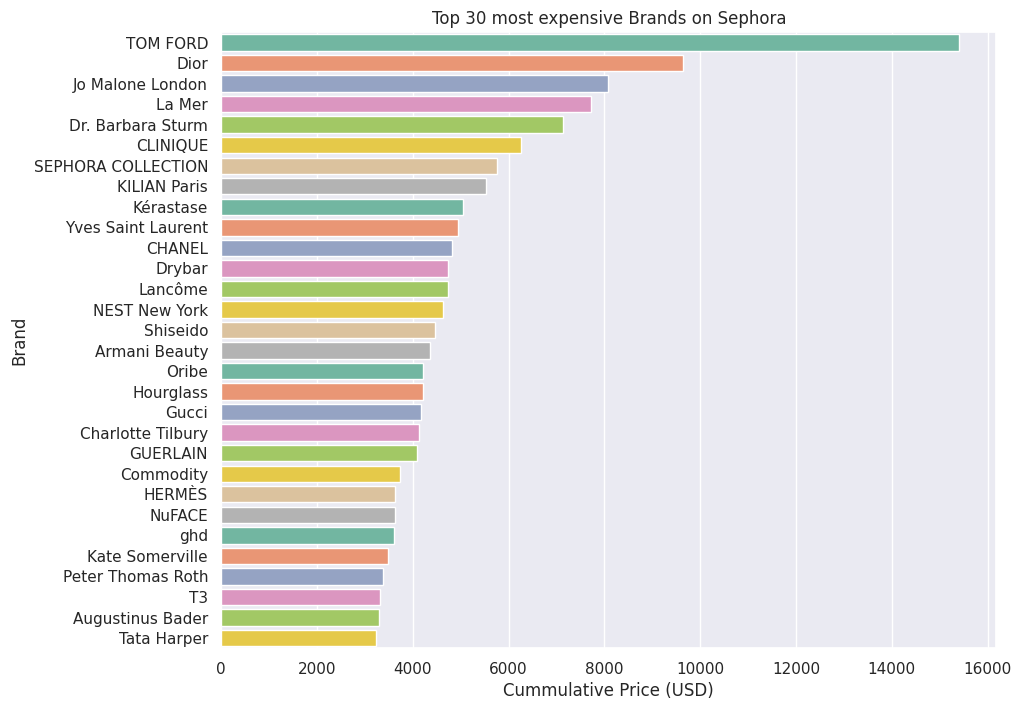

In [210]:
#Top 30 Expensive brand by Cummulative price in USD
plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
sns.barplot(data=top_exp_brand, x='price_usd',y='brand_name',palette='Set2')
plt.xlabel('Cummulative Price (USD)')
plt.ylabel('Brand')
plt.title('Top 30 most expensive Brands on Sephora')
plt.show()

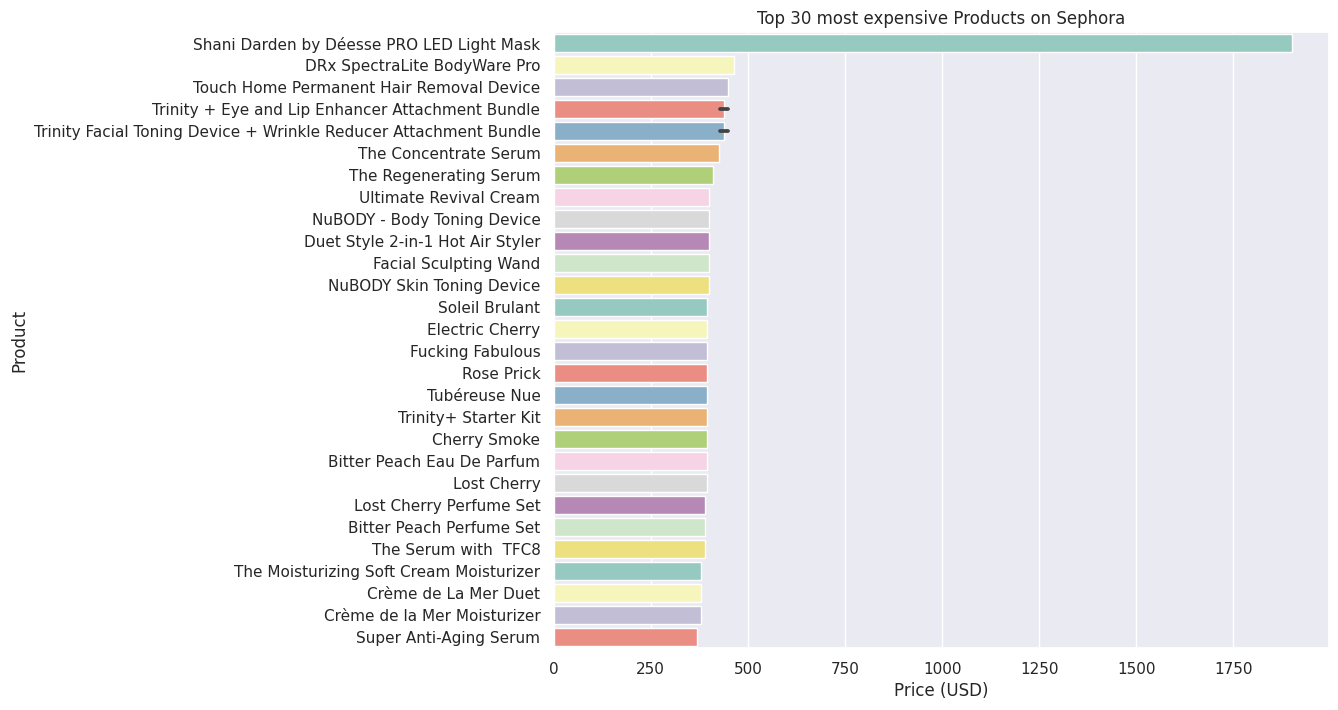

In [213]:
#Top 30 Expensive Product
plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
sns.barplot(data=top_exp_product, x='price_usd',y='product_name',palette='Set3')
plt.xlabel('Price (USD)')
plt.ylabel('Product')
plt.title('Top 30 most expensive Products on Sephora')
plt.show()

In [216]:
product.head()

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,ingredients,price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,Unknown,"['Capri Eau de Parfum:', 'Alcohol Denat. (SD A...",35.0,0,0,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,0,0,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,0,0,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 mL,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,0,0,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 mL,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,0,0,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2


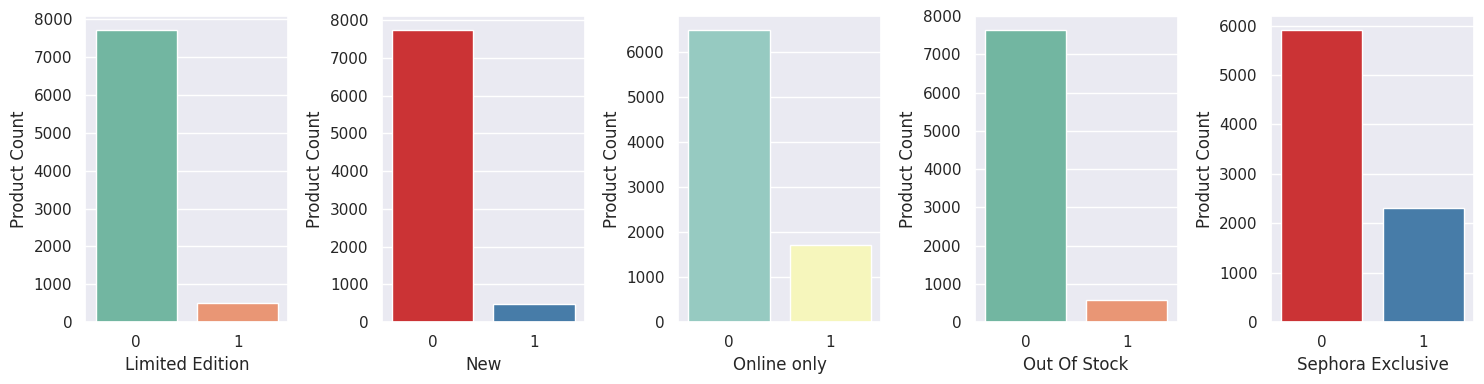

In [233]:
#Product tags distribution on Sephora (limited_edition,	new, online_only,	out_of_stock,	sephora_exclusive)
fig, axes = plt.subplots(1,5,figsize=(15, 4))

# Plot the first subplot
sns.set(style="darkgrid")
sns.countplot(x=product['limited_edition'], palette='Set2', ax=axes[0])
axes[0].set_xlabel('Limited Edition')
axes[0].set_ylabel('Product Count')
axes[0].set_xticklabels(axes[0].get_xticklabels())

# Plot the second subplot
sns.set(style="darkgrid")
sns.countplot(x=product['new'], palette='Set1', ax=axes[1])
axes[1].set_xlabel('New')
axes[1].set_ylabel('Product Count')
axes[1].set_xticklabels(axes[1].get_xticklabels())

# Plot the third subplot
sns.set(style="darkgrid")
sns.countplot(x=product['online_only'], palette='Set3', ax=axes[2])
axes[2].set_xlabel('Online only')
axes[2].set_ylabel('Product Count')
axes[2].set_xticklabels(axes[2].get_xticklabels())

# Plot the fourth subplot
sns.set(style="darkgrid")
sns.countplot(x=product['out_of_stock'], palette='Set2', ax=axes[3])
axes[3].set_xlabel('Out Of Stock')
axes[3].set_ylabel('Product Count')
axes[3].set_xticklabels(axes[3].get_xticklabels())


# Plot the fifth subplot
sns.set(style="darkgrid")
sns.countplot(x=product['sephora_exclusive'], palette='Set1', ax=axes[4])
axes[4].set_xlabel('Sephora Exclusive')
axes[4].set_ylabel('Product Count')
axes[4].set_xticklabels(axes[4].get_xticklabels())

plt.tight_layout()
plt.show()

In [235]:
#price_usd +	limited_edition	new	online_only	out_of_stock	sephora_exclusive
df = product[['price_usd','limited_edition','new','online_only','out_of_stock','sephora_exclusive']]

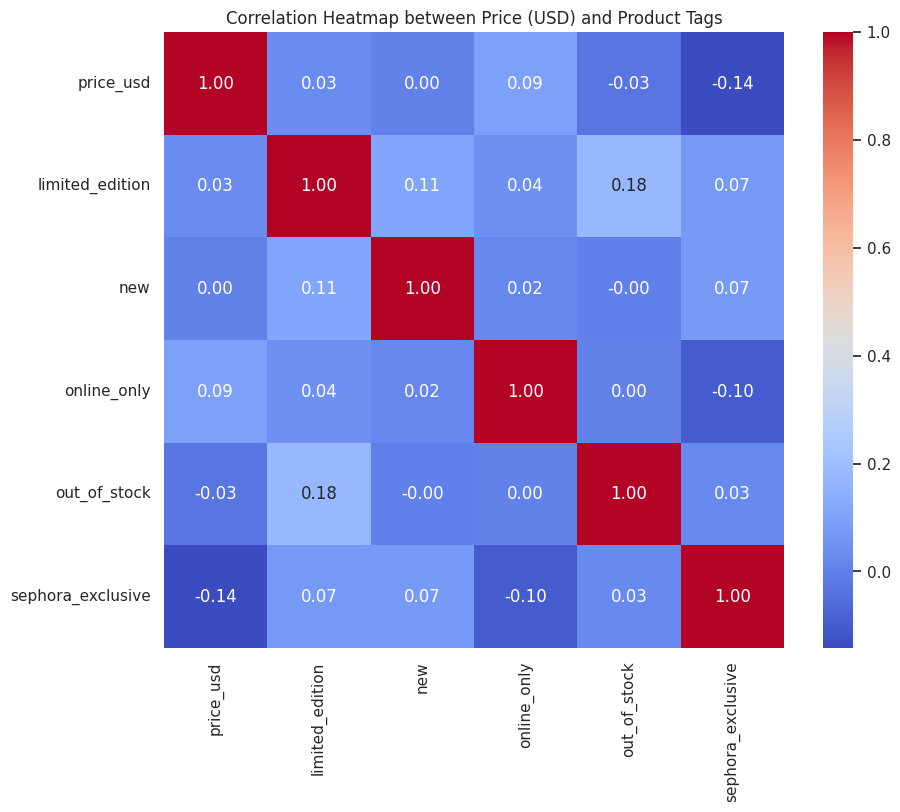

In [234]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap between Price (USD) and Product Tags')
plt.show()